In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None


In [172]:
df=pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [174]:
df.shape

(145460, 23)

In [175]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
numeric_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

## Dealing with Null Values

In [176]:
null_values = df[numeric_columns].isnull().sum()

print("Null Values in Numeric Columns:")
print(null_values)


Null Values in Numeric Columns:
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64


In [177]:
# Remove columns with more than a certain percentage of missing data (e.g., 50%)
threshold = 0.5
cols_to_remove = null_values[null_values > threshold * len(df)].index
df = df.drop(cols_to_remove, axis=1)


In [178]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
numeric_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [179]:
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())


In [180]:
df[numeric_columns].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [182]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()

for col in object_columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

print(df[object_columns].isnull().sum())


Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64


## Drop Duplicates

In [183]:
df = df.drop_duplicates()

## Detecting Outliers

In [184]:
len(numeric_columns)

16

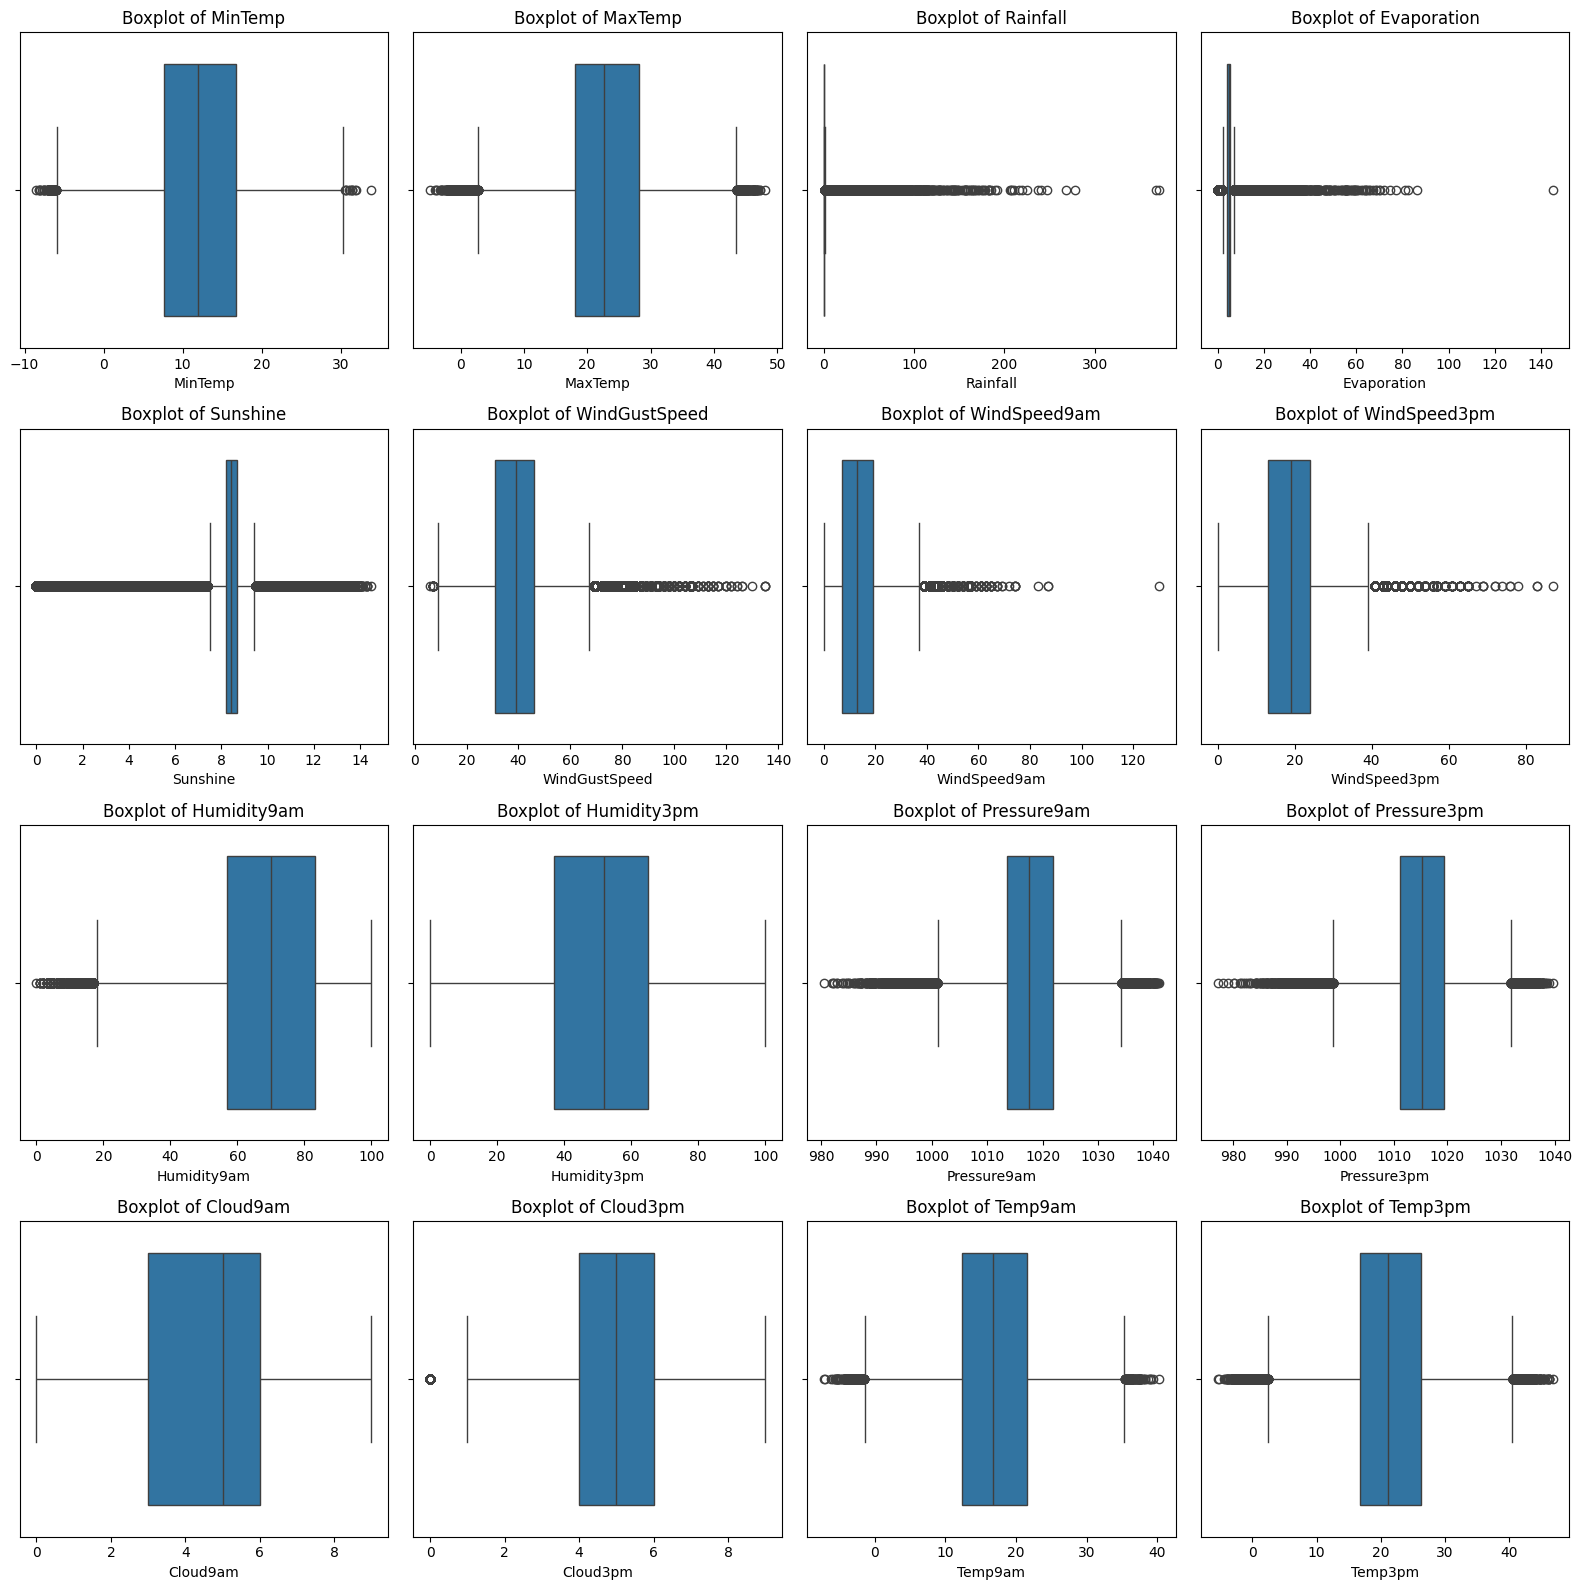

In [185]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    
plt.tight_layout()


In [186]:
def replace_outliers_with_bounds(df):
    numeric_columns = df.select_dtypes(include=np.number).columns
    
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

In [187]:
df = replace_outliers_with_bounds(df)

df.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.00000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.192336,23.219758,0.381674,4.750932,8.422820,39.64328,13.939757,18.583126,68.953025,51.553396,1017.671706,1015.268537,4.659755,4.744108,16.988207,21.671194
std,6.364499,7.067804,0.608638,1.454089,0.676532,12.17591,8.555976,8.442404,18.704151,20.471345,6.568469,6.528909,2.281490,2.037004,6.440883,6.813343
min,-5.950000,2.700000,0.000000,2.200000,7.450000,8.50000,0.000000,0.000000,18.000000,0.000000,1001.050000,998.650000,0.000000,1.000000,-1.500000,2.450000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.00000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.00000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.00000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,30.450000,43.500000,1.500000,7.000000,9.450000,68.50000,37.000000,40.500000,100.000000,100.000000,1034.250000,1031.850000,9.000000,9.000000,35.300000,40.450000


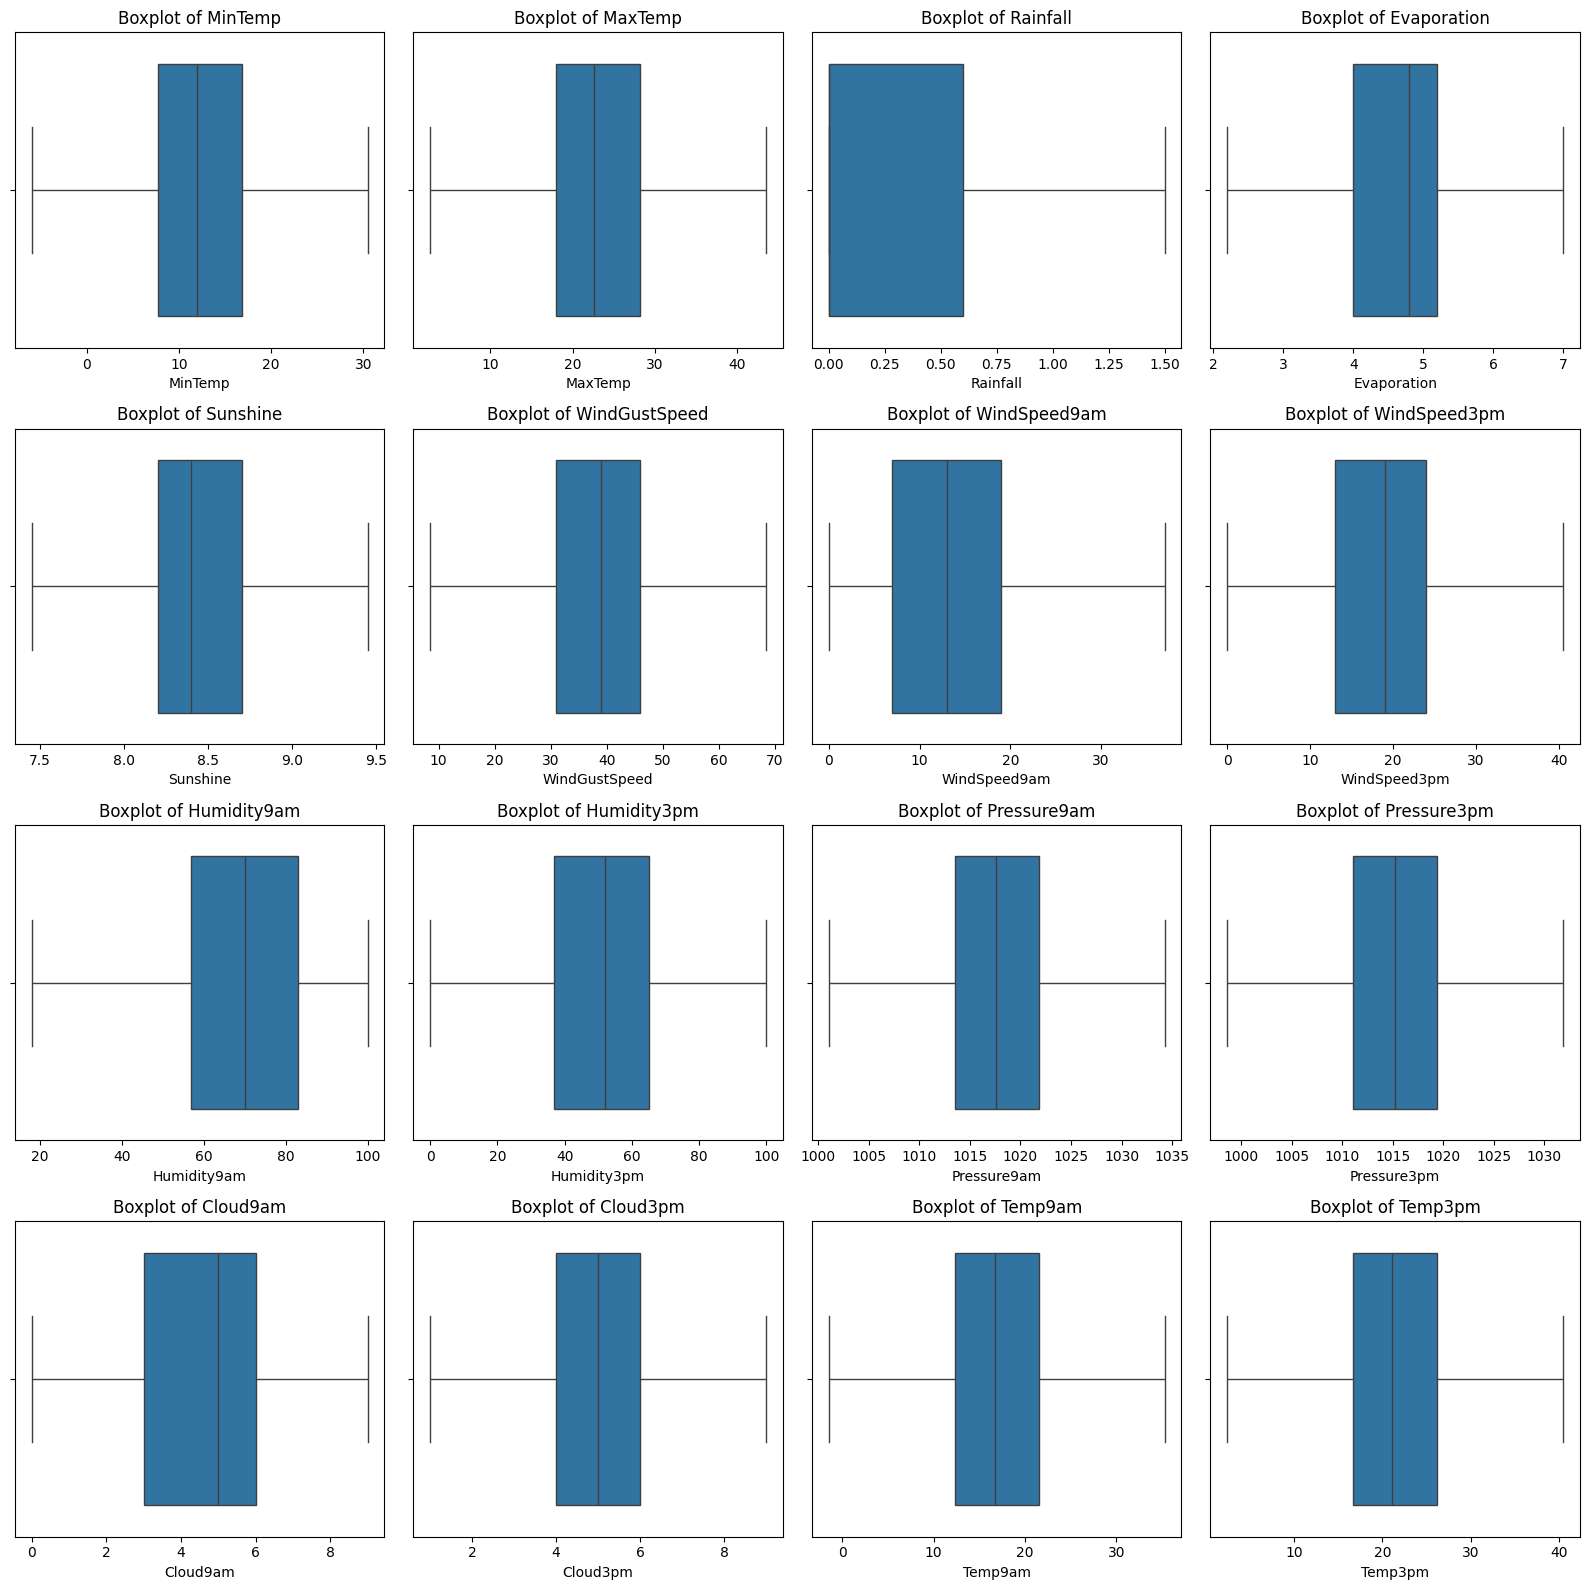

In [188]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    
plt.tight_layout()

## feature engineering

In [189]:
df['Date'] = pd.to_datetime(df['Date'])


In [190]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday


In [191]:
df['Duration'] = (df['Date'] - df['Date'].min()).dt.days

In [192]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Weekday,Duration
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1,0,396
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2,1,397
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3,2,398
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4,3,399
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5,4,400


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [194]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [195]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [196]:
direction_mapping = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90, 
    'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 'S': 180, 
    'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270, 
    'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

def encode_wind_direction(df, column):
    df[f'{column}_sin'] = df[column].map(direction_mapping).apply(lambda x: np.sin(np.radians(x)))
    df[f'{column}_cos'] = df[column].map(direction_mapping).apply(lambda x: np.cos(np.radians(x)))
    df.drop(column, axis=1, inplace=True)
    return df

for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    your_dataframe = encode_wind_direction(df, col)



In [197]:
print(df.shape)


(145460, 31)


In [198]:
print(df['RainToday'].unique())
print(df['RainTomorrow'].unique())

['No' 'Yes']
['No' 'Yes']


In [199]:
df = df.drop(columns=['Location'])

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             145460 non-null  datetime64[ns]
 1   MinTemp          145460 non-null  float64       
 2   MaxTemp          145460 non-null  float64       
 3   Rainfall         145460 non-null  float64       
 4   Evaporation      145460 non-null  float64       
 5   Sunshine         145460 non-null  float64       
 6   WindGustSpeed    145460 non-null  float64       
 7   WindSpeed9am     145460 non-null  float64       
 8   WindSpeed3pm     145460 non-null  float64       
 9   Humidity9am      145460 non-null  float64       
 10  Humidity3pm      145460 non-null  float64       
 11  Pressure9am      145460 non-null  float64       
 12  Pressure3pm      145460 non-null  float64       
 13  Cloud9am         145460 non-null  float64       
 14  Cloud3pm         145

In [201]:
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             145460 non-null  datetime64[ns]
 1   MinTemp          145460 non-null  float64       
 2   MaxTemp          145460 non-null  float64       
 3   Rainfall         145460 non-null  float64       
 4   Evaporation      145460 non-null  float64       
 5   Sunshine         145460 non-null  float64       
 6   WindGustSpeed    145460 non-null  float64       
 7   WindSpeed9am     145460 non-null  float64       
 8   WindSpeed3pm     145460 non-null  float64       
 9   Humidity9am      145460 non-null  float64       
 10  Humidity3pm      145460 non-null  float64       
 11  Pressure9am      145460 non-null  float64       
 12  Pressure3pm      145460 non-null  float64       
 13  Cloud9am         145460 non-null  float64       
 14  Cloud3pm         145

In [203]:
sample_df = df.sample(n=5000, random_state=42)


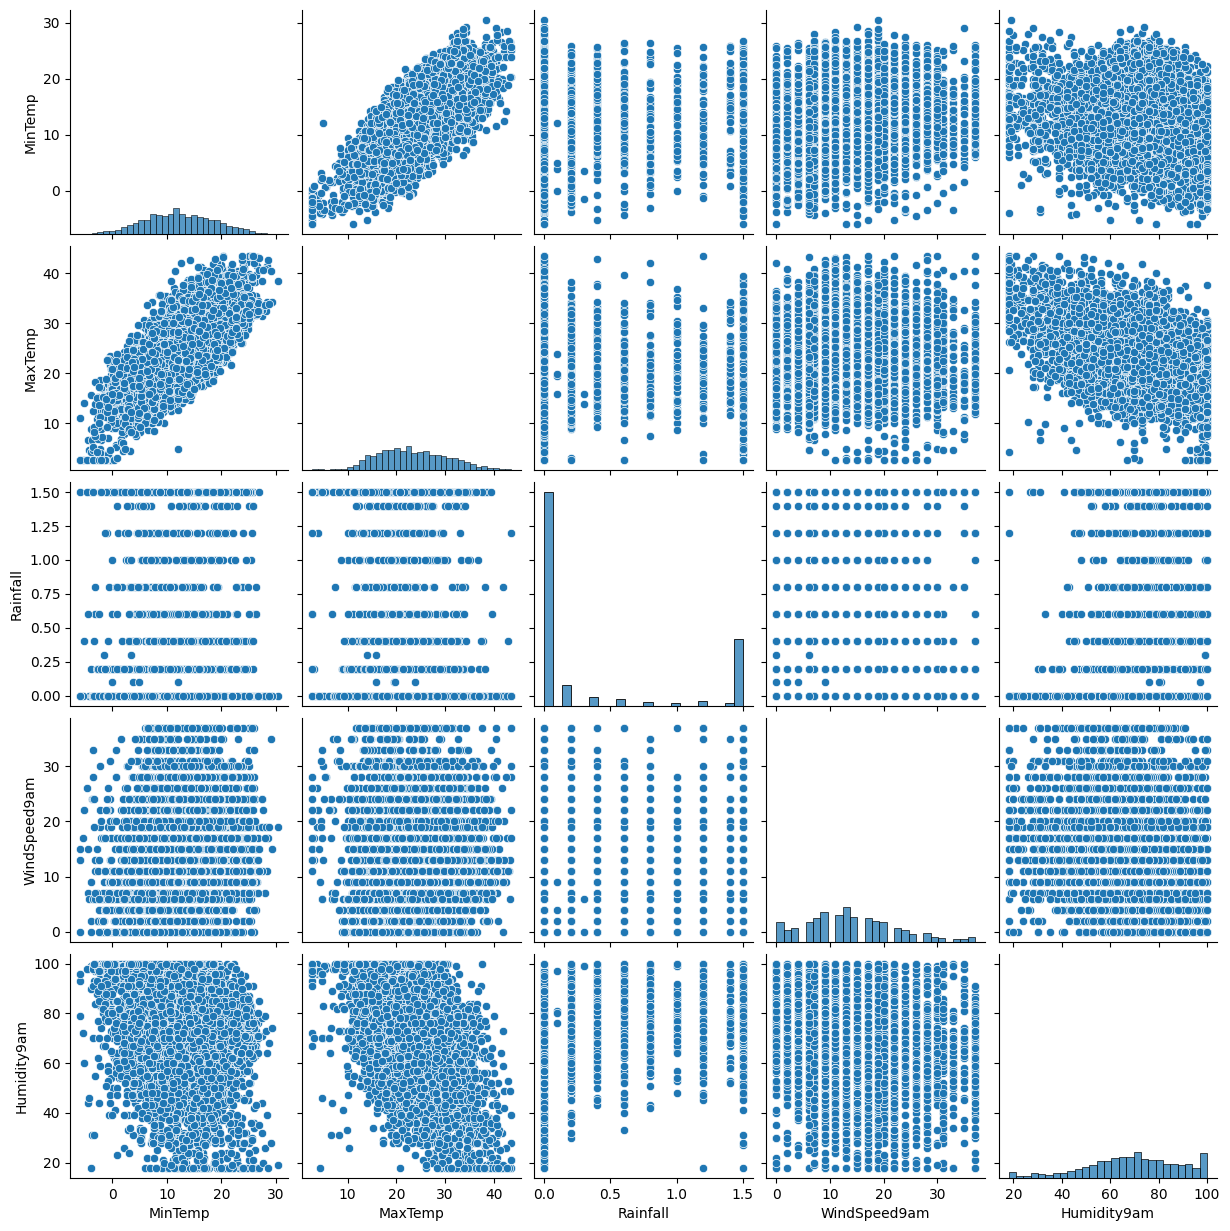

In [204]:
sns.pairplot(sample_df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'Humidity9am']])
plt.show()



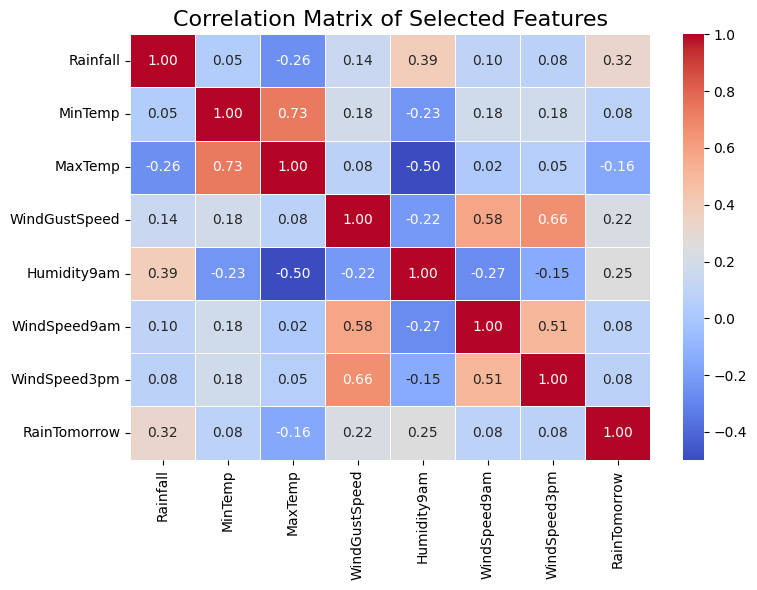

In [205]:
selected_columns = ['Rainfall', 'MinTemp', 'MaxTemp', 'WindGustSpeed', 'Humidity9am', 'WindSpeed9am', 'WindSpeed3pm', 'RainTomorrow']

correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix of Selected Features', fontsize=16)
plt.tight_layout()
plt.show()

In [206]:
px.histogram(sample_df, 
             x='Temp3pm', 
             title='Temperature at 3 pm vs. Rain Tomorrow', 
             color='RainTomorrow')

In [207]:
px.histogram(sample_df, 
             x='RainTomorrow', 
             color='RainToday', 
             title='Rain Tomorrow vs. Rain Today')

In [208]:
px.scatter(sample_df.sample(2000), 
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

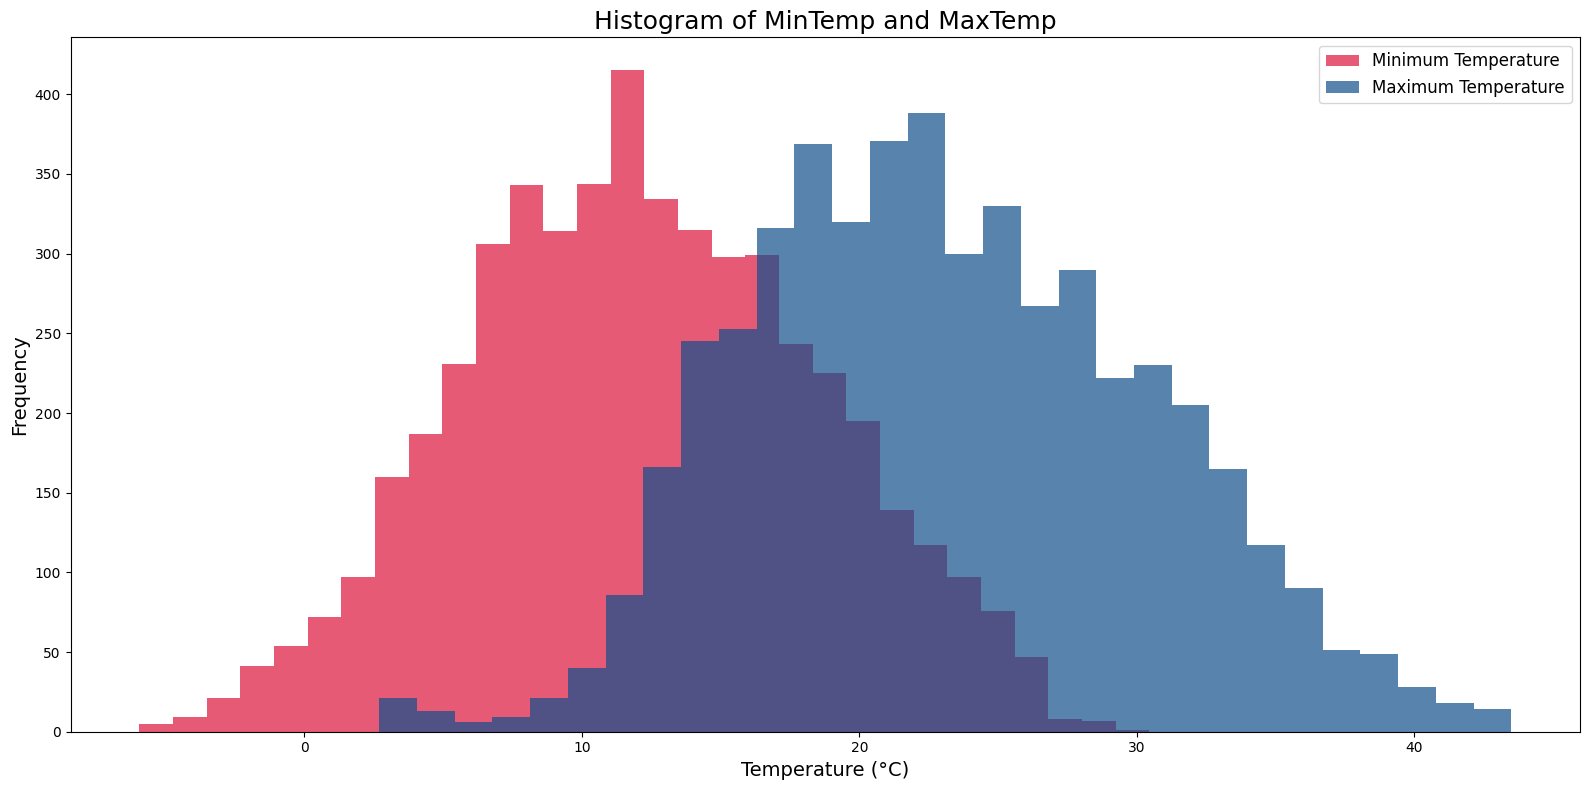

In [209]:
plt.figure(figsize=(16, 8))

plt.hist(sample_df['MinTemp'], bins=30, alpha=0.7, color='#DC143C', label='Minimum Temperature')

plt.hist(sample_df['MaxTemp'], bins=30, alpha=0.7, color='#104E8B', label='Maximum Temperature')

plt.title('Histogram of MinTemp and MaxTemp', fontsize=18)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(loc='upper right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [210]:
minimum_temperature = sample_df['MinTemp'].min()
print("Minimum Temperature:",minimum_temperature,"Degrees Celsius")
maximum_temperature = sample_df['MaxTemp'].max()
print("Maximum Temperature:",maximum_temperature,"Degrees Celsius")

Minimum Temperature: -5.950000000000002 Degrees Celsius
Maximum Temperature: 43.5 Degrees Celsius


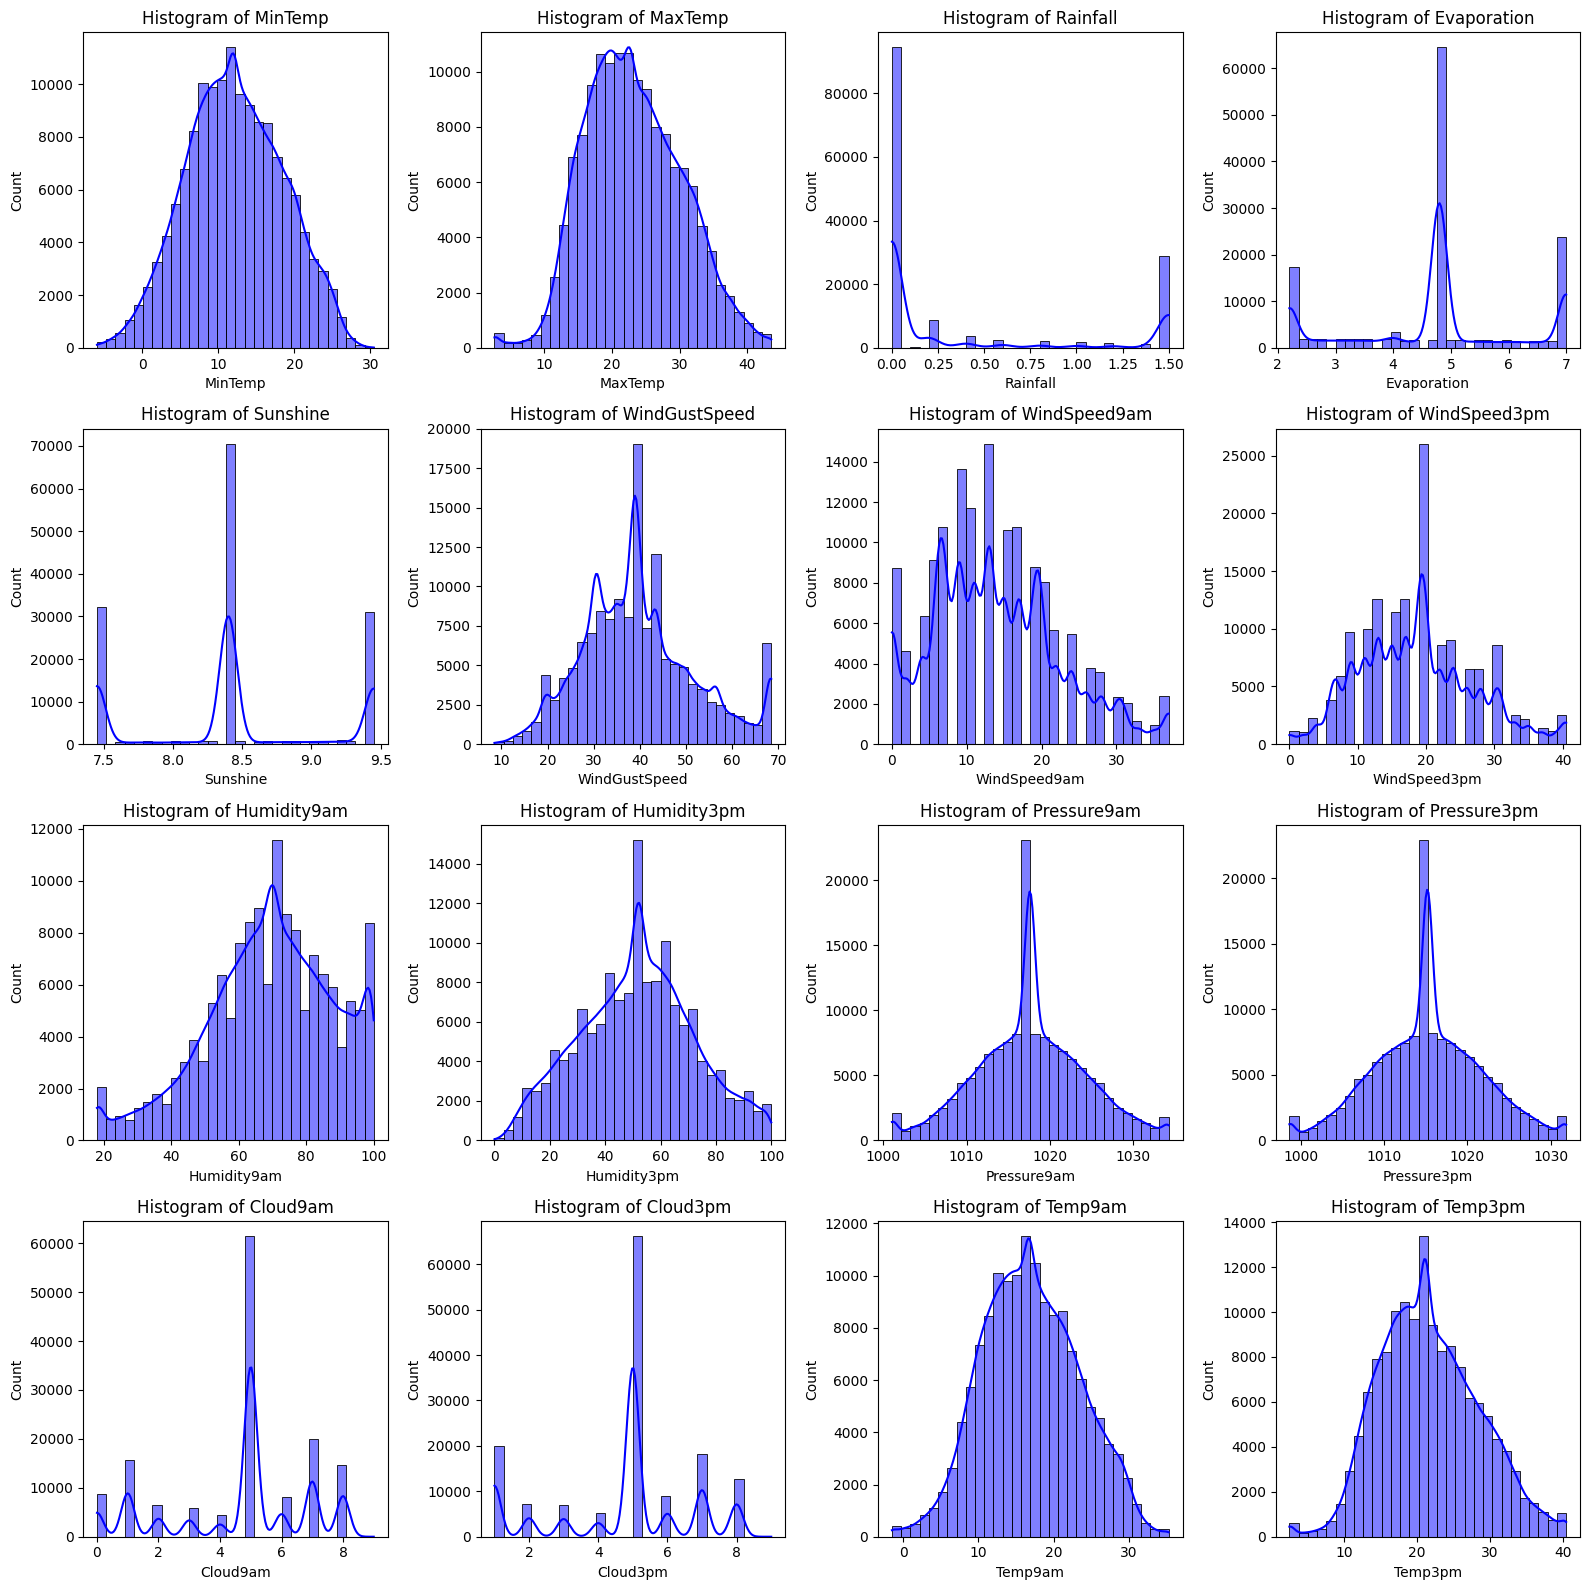

In [211]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], ax=axes[i], kde=True, color='blue', bins=30)  
    axes[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

In [212]:
df.shape

(145460, 30)

## Scaling for the data

In [213]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

scaled_values = scaler.fit_transform(df[numeric_columns])

scaled_df = pd.DataFrame(scaled_values, columns=numeric_columns)

df_scaled = df.drop(columns=numeric_columns).join(scaled_df)

df_scaled.head()

,Date,RainToday,RainTomorrow,Year,Month,Day,Weekday,Duration,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2008-12-01,0,0,2008,12,1,0,396,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16,-0.923880,3.826834e-01,0.531593,0.495098,0.400000,0.541667,0.475,0.591667,0.540541,0.592593,0.646341,0.22,0.200301,0.254518,0.888889,0.500,0.500000,0.509211
1,2008-12-02,0,0,2008,12,2,1,397,-0.923880,3.826834e-01,-0.382683,9.238795e-01,-0.923880,-3.826834e-01,0.366758,0.549020,0.000000,0.541667,0.475,0.591667,0.108108,0.543210,0.317073,0.25,0.287651,0.275602,0.555556,0.500,0.508152,0.575000
2,2008-12-03,0,0,2008,12,3,2,398,-0.923880,-3.826834e-01,-1.000000,-1.836970e-16,-0.923880,-3.826834e-01,0.517857,0.563725,0.000000,0.541667,0.475,0.625000,0.513514,0.641975,0.243902,0.30,0.197289,0.302711,0.555556,0.125,0.611413,0.546053
3,2008-12-04,0,0,2008,12,4,3,399,0.707107,7.071068e-01,0.707107,-7.071068e-01,1.000000,6.123234e-17,0.416209,0.620098,0.000000,0.541667,0.475,0.258333,0.297297,0.222222,0.329268,0.16,0.498494,0.426205,0.555556,0.500,0.532609,0.632895
4,2008-12-05,0,0,2008,12,5,4,400,-1.000000,-1.836970e-16,0.923880,3.826834e-01,-0.707107,7.071068e-01,0.644231,0.725490,0.666667,0.541667,0.475,0.541667,0.189189,0.493827,0.780488,0.33,0.293675,0.221386,0.777778,0.875,0.524457,0.717105


In [214]:
numeric_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [215]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             145460 non-null  datetime64[ns]
 1   RainToday        145460 non-null  int64         
 2   RainTomorrow     145460 non-null  int64         
 3   Year             145460 non-null  int32         
 4   Month            145460 non-null  int32         
 5   Day              145460 non-null  int32         
 6   Weekday          145460 non-null  int32         
 7   Duration         145460 non-null  int64         
 8   WindGustDir_sin  145460 non-null  float64       
 9   WindGustDir_cos  145460 non-null  float64       
 10  WindDir9am_sin   145460 non-null  float64       
 11  WindDir9am_cos   145460 non-null  float64       
 12  WindDir3pm_sin   145460 non-null  float64       
 13  WindDir3pm_cos   145460 non-null  float64       
 14  MinTemp          145

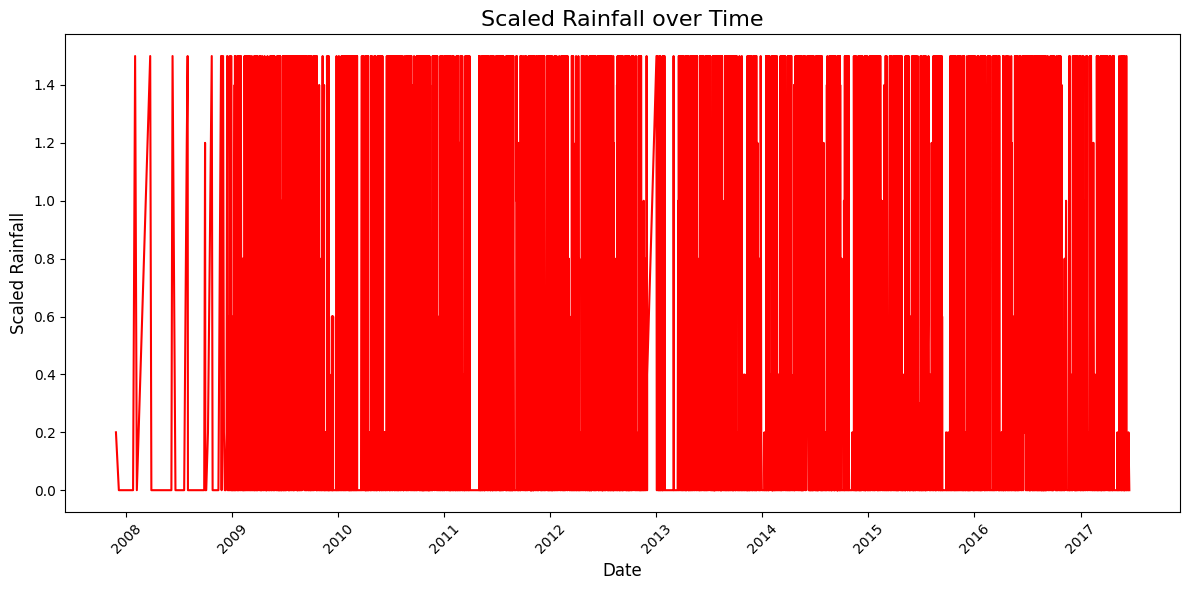

In [216]:
sample_df = sample_df.sort_values(by='Date')

plt.figure(figsize=(12, 6))
plt.plot(sample_df['Date'], sample_df['Rainfall'], color='r', linewidth=1.5)

plt.title('Scaled Rainfall over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Scaled Rainfall', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [217]:
df_scaled.shape

(145460, 30)

In [218]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             145460 non-null  datetime64[ns]
 1   RainToday        145460 non-null  int64         
 2   RainTomorrow     145460 non-null  int64         
 3   Year             145460 non-null  int32         
 4   Month            145460 non-null  int32         
 5   Day              145460 non-null  int32         
 6   Weekday          145460 non-null  int32         
 7   Duration         145460 non-null  int64         
 8   WindGustDir_sin  145460 non-null  float64       
 9   WindGustDir_cos  145460 non-null  float64       
 10  WindDir9am_sin   145460 non-null  float64       
 11  WindDir9am_cos   145460 non-null  float64       
 12  WindDir3pm_sin   145460 non-null  float64       
 13  WindDir3pm_cos   145460 non-null  float64       
 14  MinTemp          145

In [219]:
df_scaled_sample = df_scaled.sample(n=50000, random_state=42)


In [220]:
train_df = df_scaled_sample[df_scaled_sample['Year'] < 2015]
val_df = df_scaled_sample[df_scaled_sample['Year'] == 2015]
test_df = df_scaled_sample[df_scaled_sample['Year'] > 2015]

print(f"Training data: {train_df.shape}")
print(f"Validation data: {val_df.shape}")
print(f"Testing data: {test_df.shape}")


Training data: (34829, 30)
Validation data: (6030, 30)
Testing data: (9141, 30)


In [221]:
X_train = train_df.drop(['RainTomorrow', 'Date'], axis=1)
y_train = train_df['RainTomorrow']

X_val = val_df.drop(['RainTomorrow', 'Date'], axis=1)
y_val = val_df['RainTomorrow']

X_test = test_df.drop(['RainTomorrow', 'Date'], axis=1)
y_test = test_df['RainTomorrow']


In [222]:
X_train.head()

,RainToday,Year,Month,Day,Weekday,Duration,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
100721,1,2012,4,22,6,1634,-0.382683,9.238795e-01,-0.382683,9.238795e-01,-7.071068e-01,0.707107,0.575549,0.397059,1.0,0.916667,0.275,0.758333,0.648649,0.765432,0.670732,0.64,0.125000,0.152108,0.444444,0.500,0.510870,0.398684
30234,0,2008,3,30,6,150,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16,-9.238795e-01,0.382683,0.523352,0.590686,0.0,0.500000,1.000,0.508333,0.594595,0.370370,0.524390,0.22,0.359940,0.311747,0.000000,0.000,0.500000,0.617105
68427,0,2011,12,10,5,1500,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000e+00,1.000000,0.685440,0.644608,0.0,1.000000,0.000,0.841667,1.000000,0.543210,0.390244,0.38,0.164157,0.143072,0.555556,0.500,0.698370,0.651316
28624,0,2013,3,27,2,1973,0.707107,7.071068e-01,0.000000,1.000000e+00,7.071068e-01,0.707107,0.660714,0.723039,0.0,0.000000,0.475,0.358333,0.000000,0.419753,0.987805,0.51,0.546687,0.480422,0.555556,0.500,0.608696,0.767105
31173,1,2010,10,25,0,1089,-0.382683,-9.238795e-01,-0.707107,-7.071068e-01,1.224647e-16,-1.000000,0.545330,0.414216,1.0,0.000000,0.000,0.691667,0.459459,0.543210,0.878049,0.64,0.498494,0.594880,0.777778,0.625,0.461957,0.438158


# KNN

In [223]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors= 7)  


knn.fit(X_train, y_train)

y_val_pred_Knn = knn.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_Knn))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_Knn))


Validation Accuracy: 0.7902155887230514

Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      4760
           1       0.62      0.01      0.02      1270

    accuracy                           0.79      6030
   macro avg       0.70      0.50      0.45      6030
weighted avg       0.75      0.79      0.70      6030



Test Accuracy: 0.7716879991248222

Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      7054
           1       0.00      0.00      0.00      2087

    accuracy                           0.77      9141
   macro avg       0.39      0.50      0.44      9141
weighted avg       0.60      0.77      0.67      9141



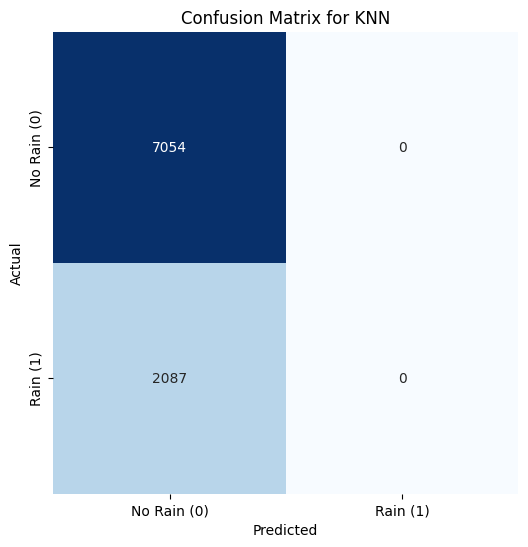

In [224]:
y_test_pred_knn = knn.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred_knn))

print("\nClassification Report:\n", classification_report(y_test, y_test_pred_knn))

cm = confusion_matrix(y_test, y_test_pred_knn)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Rain (0)', 'Rain (1)'], yticklabels=['No Rain (0)', 'Rain (1)'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')

plt.show()

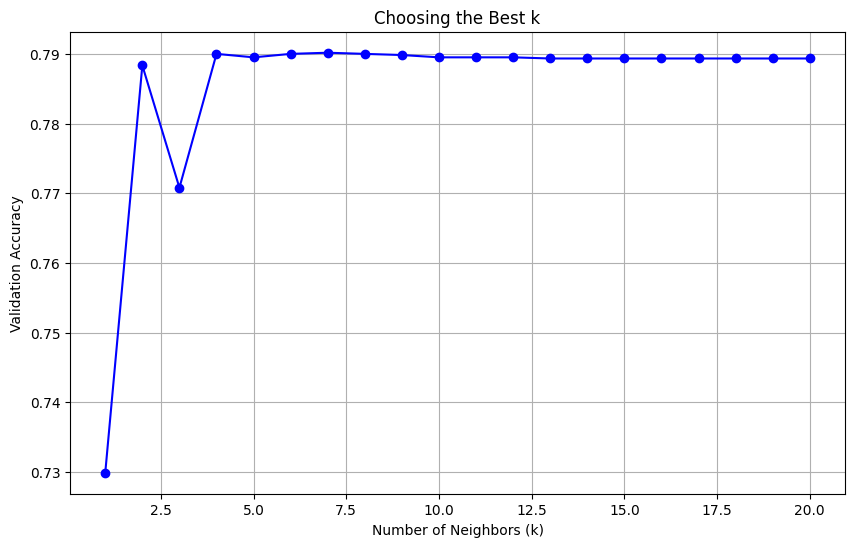

The best k is: 7


In [225]:
def choose_best_k(X_train, y_train, X_val, y_val):
    accuracy = []
    for k in range(1, 21):  
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        accuracy.append(accuracy_score(y_val, knn.predict(X_val)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 21), accuracy, marker='o', color='b')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Validation Accuracy')
    plt.title('Choosing the Best k')
    plt.grid()
    plt.show()

    best_k = accuracy.index(max(accuracy)) + 1  
    return best_k

best_k = choose_best_k(X_train, y_train, X_val, y_val)
print(f"The best k is: {best_k}")


# Naive Bayes

Naive Bayes Validation Accuracy: 0.796849087893864

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      4760
           1       0.52      0.60      0.55      1270

    accuracy                           0.80      6030
   macro avg       0.70      0.72      0.71      6030
weighted avg       0.81      0.80      0.80      6030

Naive Bayes Test Accuracy: 0.7873318017722349

Naive Bayes Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      7054
           1       0.53      0.60      0.56      2087

    accuracy                           0.79      9141
   macro avg       0.70      0.72      0.71      9141
weighted avg       0.80      0.79      0.79      9141



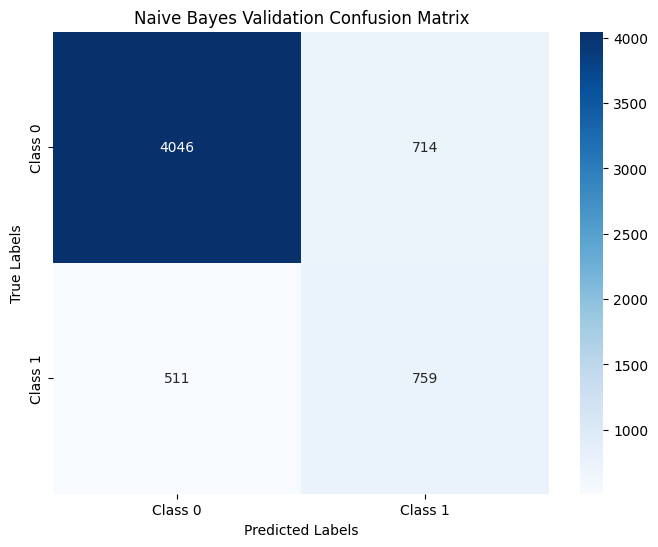

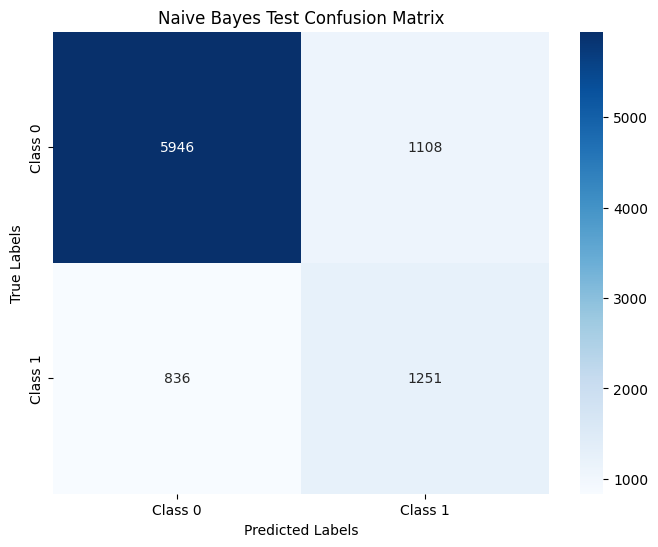

In [226]:
nb = GaussianNB()

nb.fit(X_train, y_train)

y_val_pred_nb = nb.predict(X_val)
print("Naive Bayes Validation Accuracy:", accuracy_score(y_val, y_val_pred_nb))
print("\nNaive Bayes Classification Report:\n", classification_report(y_val, y_val_pred_nb))

y_test_pred_nb = nb.predict(X_test)
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_test_pred_nb))
print("\nNaive Bayes Test Classification Report:\n", classification_report(y_test, y_test_pred_nb))

cm_val = confusion_matrix(y_val, y_val_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Naive Bayes Validation Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

cm_test = confusion_matrix(y_test, y_test_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Naive Bayes Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# SVM

default parameters => C=1.0, kernel='rbf',gamma='scale'

In [228]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

df_scaled_sample_trial = df_scaled.sample(n=100, random_state=42)

train_df_trial = df_scaled_sample_trial[df_scaled_sample_trial['Year'] < 2015]
val_df_trial = df_scaled_sample_trial[df_scaled_sample_trial['Year'] == 2015]
test_df_trial = df_scaled_sample_trial[df_scaled_sample_trial['Year'] > 2015]

X_train1 = train_df_trial.drop(['RainTomorrow', 'Date'], axis=1)
y_train1 = train_df_trial['RainTomorrow']

param_dist = {
    'C': [1, 10, 100, 1000],
    'gamma': [1, 10, 0.1, 0.01],
    'kernel': ['linear', 'rbf', 'poly']
}

svm = SVC(random_state=2)

random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=10, cv=2, 
                                   scoring='accuracy', verbose=2, n_jobs=-1, random_state=2)

random_search.fit(X_train1, y_train1)

print("Best parameters found: ", random_search.best_params_)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters found:  {'kernel': 'linear', 'gamma': 1, 'C': 1}


In [229]:

svm = SVC(kernel='linear', gamma=1, C=1, random_state=42)

svm.fit(X_train, y_train)

y_val_pred_svm = svm.predict(X_val)

print("SVM Validation Accuracy:", accuracy_score(y_val, y_val_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_val, y_val_pred_svm))

y_test_pred_svm = svm.predict(X_test)

print("SVM Test Accuracy:", accuracy_score(y_test, y_test_pred_svm))
print("\nSVM Test Classification Report:\n", classification_report(y_test, y_test_pred_svm))


SVM Validation Accuracy: 0.8434494195688226

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      4760
           1       0.81      0.34      0.48      1270

    accuracy                           0.84      6030
   macro avg       0.83      0.66      0.69      6030
weighted avg       0.84      0.84      0.82      6030

SVM Test Accuracy: 0.8290121430915655

SVM Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90      7054
           1       0.80      0.34      0.47      2087

    accuracy                           0.83      9141
   macro avg       0.81      0.66      0.69      9141
weighted avg       0.82      0.83      0.80      9141



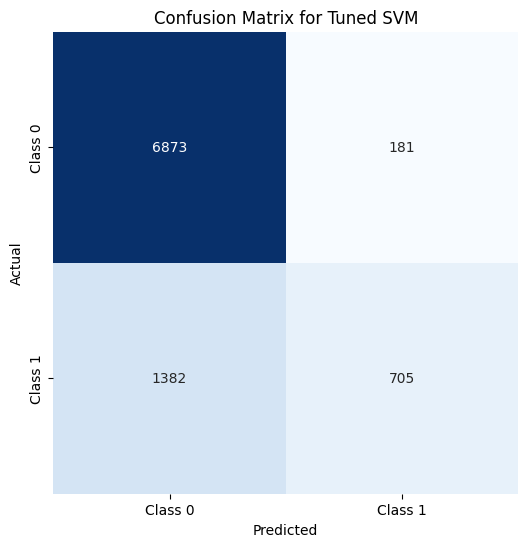

In [230]:
cm = confusion_matrix(y_test, y_test_pred_svm)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tuned SVM')
plt.show()


# Decision tree using Random Forest

In [231]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

rf_model = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                              scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

print("Best Parameters:", grid_search_rf.best_params_)

best_rf_model = grid_search_rf.best_estimator_
y_val_pred_rf = best_rf_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_rf))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Validation Accuracy: 0.8494195688225539

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      4760
           1       0.76      0.42      0.54      1270

    accuracy                           0.85      6030
   macro avg       0.81      0.69      0.72      6030
weighted avg       0.84      0.85      0.83      6030



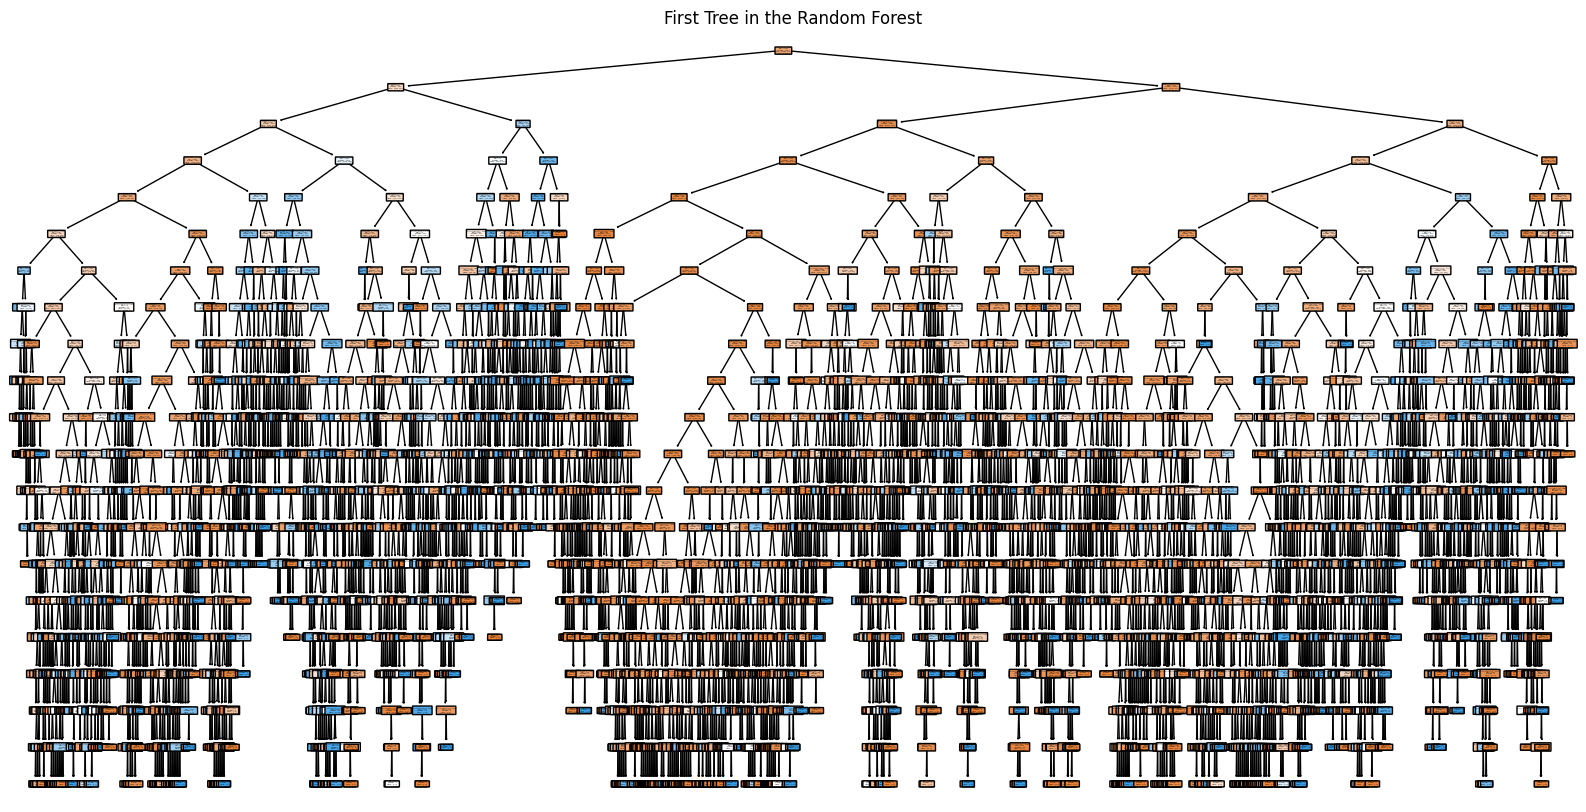

In [235]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_rf_model.estimators_[0], filled=True, feature_names=X_train.columns, class_names=['No Rain (0)', 'Rain (1)'], rounded=True)
plt.title('First Tree in the Random Forest')
plt.show()


Test Accuracy: 0.8378733180177224

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      7054
           1       0.73      0.46      0.56      2087

    accuracy                           0.84      9141
   macro avg       0.79      0.70      0.73      9141
weighted avg       0.83      0.84      0.82      9141



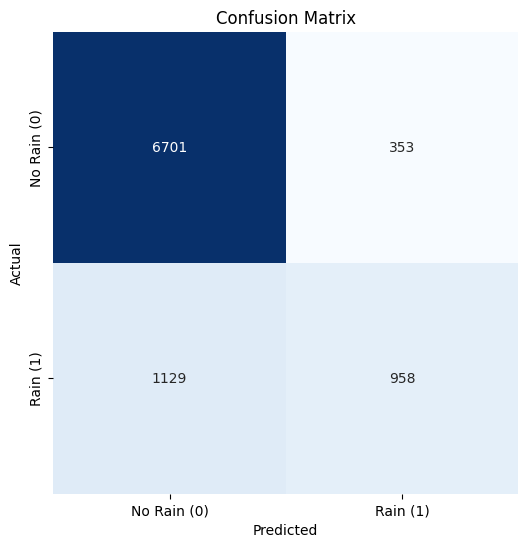

In [232]:
y_test_pred_rf = best_rf_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))

print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rf))

conf_matrix = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Rain (0)', 'Rain (1)'], yticklabels=['No Rain (0)', 'Rain (1)'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()


In [233]:
y_val_pred_rf = best_rf_model.predict(X_val)

validation_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)


y_test_pred_rf = best_rf_model.predict(X_test)

test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)


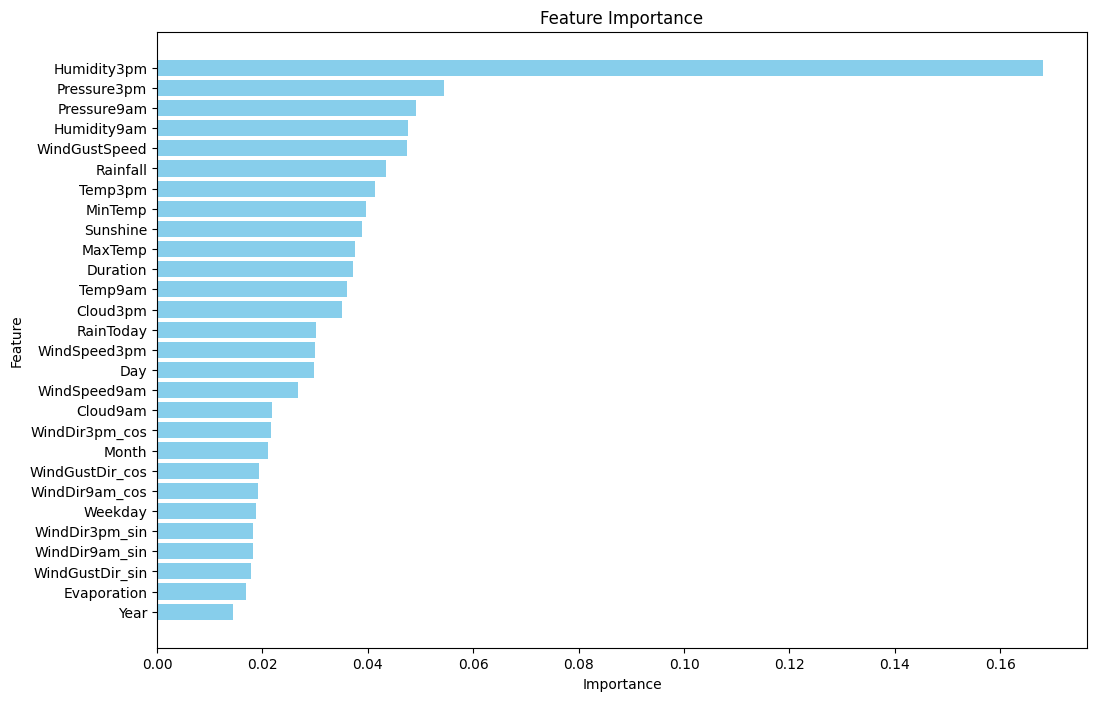

In [234]:
feature_importance = best_rf_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


## Noraml decision tree

In [236]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 5, 10, 15, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5],  
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5,  
                           verbose=2, 
                           n_jobs=-1)  

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_dt = grid_search.best_estimator_
y_val_pred_best_dt = best_dt.predict(X_val)

print("Optimized Decision Tree Validation Accuracy:", accuracy_score(y_val, y_val_pred_best_dt))
print("\nOptimized Decision Tree Classification Report:\n", classification_report(y_val, y_val_pred_best_dt))

y_test_pred_best_dt = best_dt.predict(X_test)
print("Optimized Decision Tree Test Accuracy:", accuracy_score(y_test, y_test_pred_best_dt))
print("\nOptimized Decision Tree Test Classification Report:\n", classification_report(y_test, y_test_pred_best_dt))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8355393636901953
Optimized Decision Tree Validation Accuracy: 0.8444444444444444

Optimized Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      4760
           1       0.74      0.40      0.52      1270

    accuracy                           0.84      6030
   macro avg       0.80      0.68      0.71      6030
weighted avg       0.83      0.84      0.83      6030

Optimized Decision Tree Test Accuracy: 0.8254020347883164

Optimized Decision Tree Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.89      7054
           1       0.72      0.38      0.50      2087

    accuracy                           0.83      9141
   macro avg

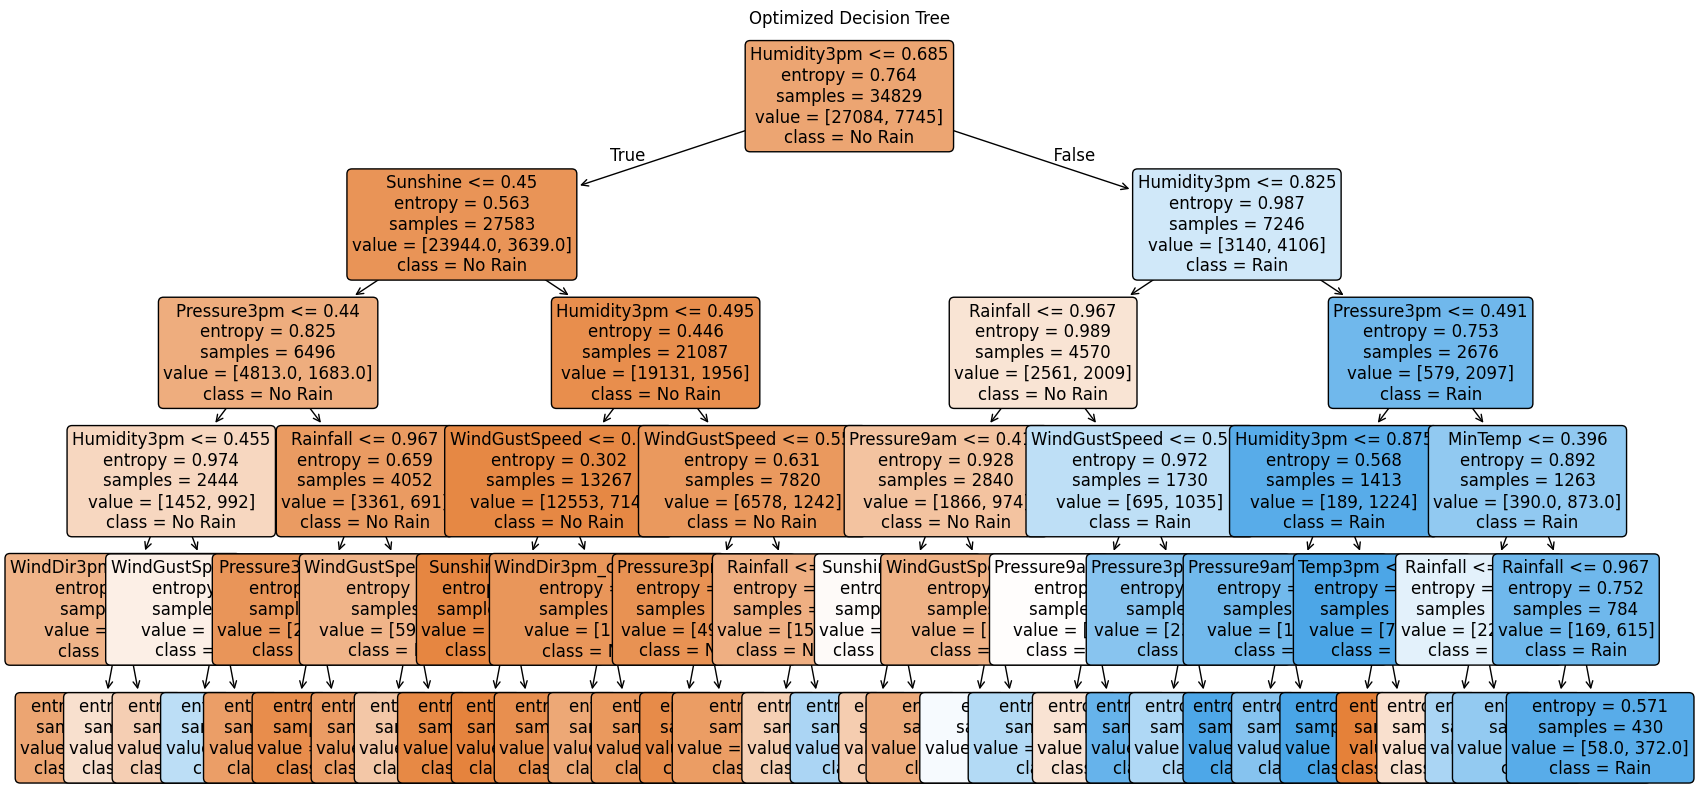

In [237]:
from sklearn.tree import plot_tree


plt.figure(figsize=(20, 10))
plot_tree(best_dt, 
          feature_names=X_train.columns,  
          class_names=['No Rain', 'Rain'],  
          filled=True, 
          rounded=True, 
          fontsize=12)

plt.title("Optimized Decision Tree")
plt.show()


# Comparative Analysis


Model Comparison Results:

       Algorithm  Validation Accuracy  Test Accuracy
0            KNN             0.790216       0.771688
1    Naive Bayes             0.796849       0.787332
2    SVM (Tuned)             0.843449       0.829012
3  Decision Tree             0.844444       0.825402
4  Random Forest             0.849420       0.837873


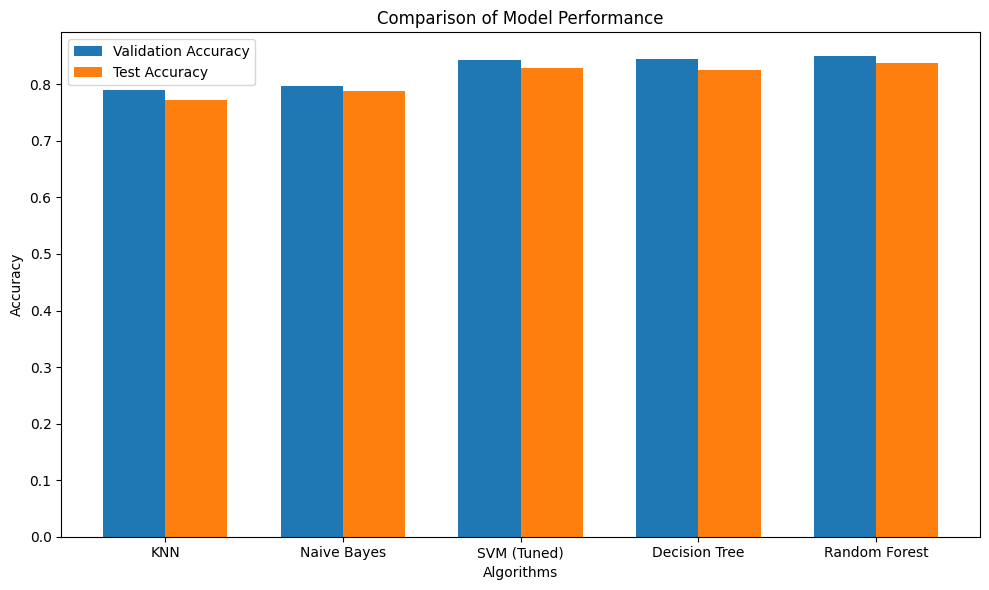

In [238]:
models = ['KNN', 'Naive Bayes', 'SVM (Tuned)', 'Decision Tree', 'Random Forest']

validation_accuracies = [
    accuracy_score(y_val, knn.predict(X_val)),
    accuracy_score(y_val, y_val_pred_nb),
    accuracy_score(y_val, y_val_pred_svm),
    accuracy_score(y_val, y_val_pred_best_dt),
    validation_accuracy_rf  
]

test_accuracies = [
    accuracy_score(y_test, y_test_pred_knn),
    accuracy_score(y_test, y_test_pred_nb),
    accuracy_score(y_test, y_test_pred_svm),
    accuracy_score(y_test, y_test_pred_best_dt),
    test_accuracy_rf  
]

comparison_results = {
    'Algorithm': models,
    'Validation Accuracy': validation_accuracies,
    'Test Accuracy': test_accuracies
}

comparison_df = pd.DataFrame(comparison_results)

print("\nModel Comparison Results:\n")
print(comparison_df)

x = np.arange(len(models))  

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
rects1 = ax.bar(x - bar_width/2, validation_accuracies, bar_width, label='Validation Accuracy')
rects2 = ax.bar(x + bar_width/2, test_accuracies, bar_width, label='Test Accuracy')

ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


In [239]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_scores = [
    f1_score(y_test, y_test_pred_knn, average='weighted'),
    f1_score(y_test, y_test_pred_nb, average='weighted'),
    f1_score(y_test, y_test_pred_svm, average='weighted'),
    f1_score(y_test, y_test_pred_best_dt, average='weighted'),
    f1_score(y_test, y_test_pred_rf, average='weighted')  
]

precision_scores = [
    precision_score(y_test, y_test_pred_knn, average='weighted'),
    precision_score(y_test, y_test_pred_nb, average='weighted'),
    precision_score(y_test, y_test_pred_svm, average='weighted'),
    precision_score(y_test, y_test_pred_best_dt, average='weighted'),
    precision_score(y_test, y_test_pred_rf, average='weighted') 
]

recall_scores = [
    recall_score(y_test, y_test_pred_knn, average='weighted'),
    recall_score(y_test, y_test_pred_nb, average='weighted'),
    recall_score(y_test, y_test_pred_svm, average='weighted'),
    recall_score(y_test, y_test_pred_best_dt, average='weighted'),
    recall_score(y_test, y_test_pred_rf, average='weighted') 
]

comparison_results = {
    'Algorithm': models,
    'Test Accuracy': test_accuracies,
    'F1 Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
}

comparison_df = pd.DataFrame(comparison_results)

print("\nExtended Model Comparison Results:\n")
comparison_df



Extended Model Comparison Results:



,Algorithm,Test Accuracy,F1 Score,Precision,Recall
0,KNN,0.771688,0.672243,0.595502,0.771688
1,Naive Bayes,0.787332,0.791747,0.797640,0.787332
2,SVM (Tuned),0.829012,0.801182,0.824167,0.829012
3,Decision Tree,0.825402,0.804165,0.812814,0.825402
4,Random Forest,0.837873,0.823587,0.827256,0.837873


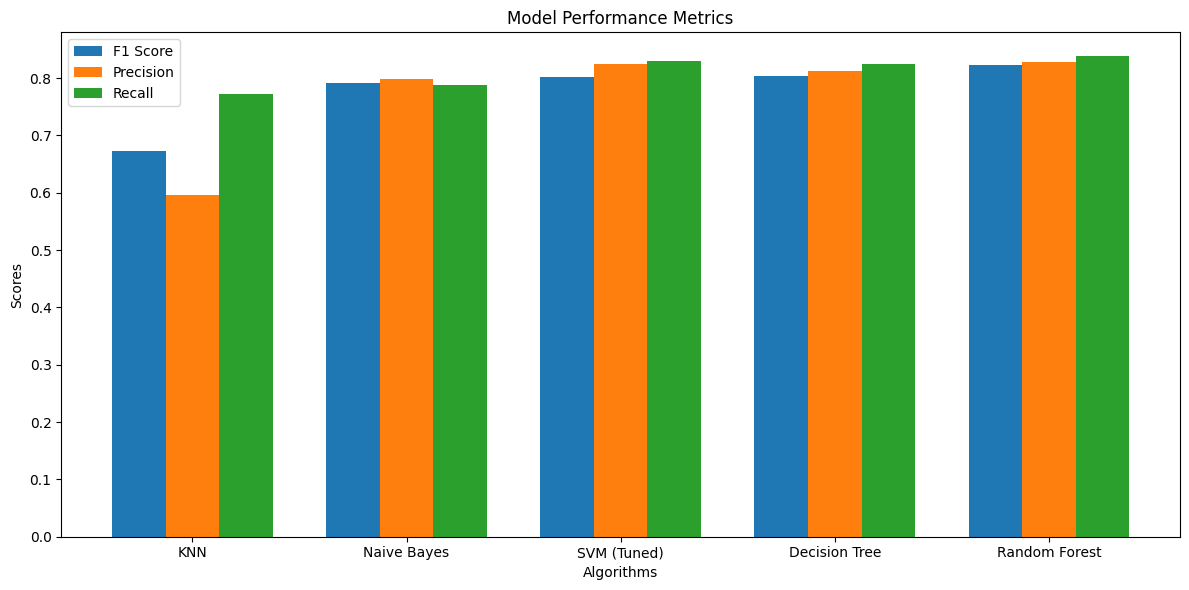

In [240]:
x = np.arange(len(models))  
fig, ax = plt.subplots(figsize=(12, 6))  

bar_width = 0.25 
metrics = ['F1 Score', 'Precision', 'Recall']

for i, metric in enumerate(metrics):
    ax.bar(x + i * bar_width - bar_width, comparison_df[metric], bar_width, label=metric)

ax.set_title('Model Performance Metrics')
ax.set_xlabel('Algorithms')
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


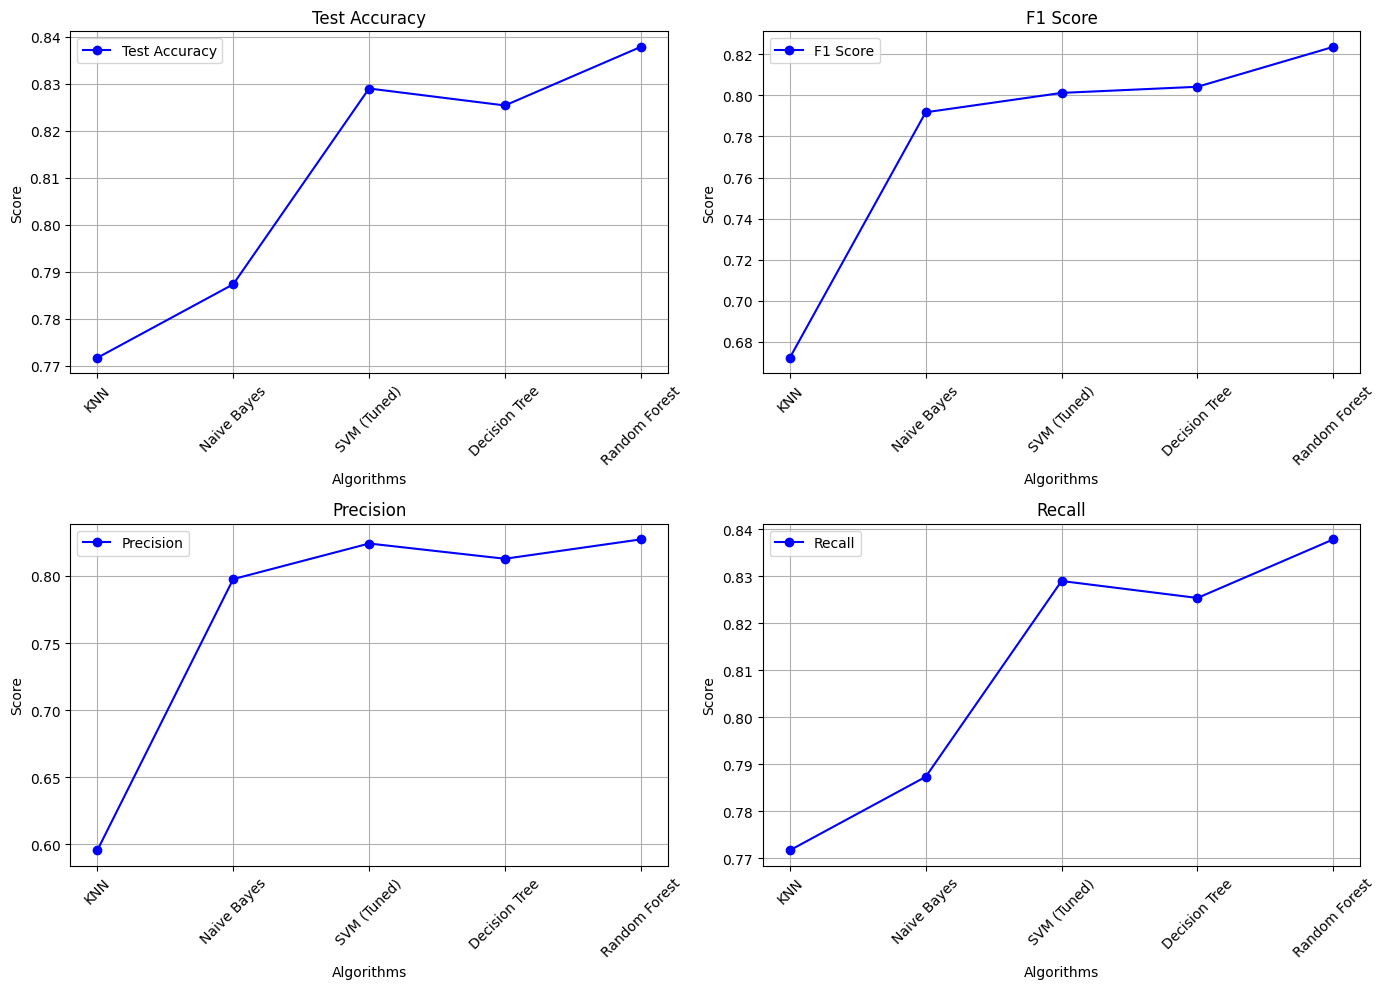

In [241]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  
metrics = {
    "Test Accuracy": comparison_df["Test Accuracy"],
    "F1 Score": comparison_df["F1 Score"],
    "Precision": comparison_df["Precision"],
    "Recall": comparison_df["Recall"]
}

for ax, (metric_name, values) in zip(axes.flat, metrics.items()):
    ax.plot(x, values, marker='o', label=metric_name, color='b')
    ax.set_title(metric_name)
    ax.set_xlabel("Algorithms")
    ax.set_ylabel("Score")
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

## Saving the best model

In [242]:
import joblib

joblib.dump(best_rf_model, 'random_forest_model.pkl')

print("Random Forest model saved as 'random_forest_model.pkl'")


Random Forest model saved as 'random_forest_model.pkl'


In [243]:
loaded_rf_model = joblib.load('random_forest_model.pkl')

y_test_pred_loaded_rf = loaded_rf_model.predict(X_test)
print("Test Accuracy with Loaded Model:", accuracy_score(y_test, y_test_pred_loaded_rf))


Test Accuracy with Loaded Model: 0.8378733180177224
